In [1]:
import numpy as np
import math
import ceo
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
NL = 1
n = 8
NP = n*NL+1
d = 0.1
src = ceo.Source("K",resolution=(NP,NP))

In [3]:
wfs = ceo.ShackHartmann(NL, n, d, DFT_osf=2, N_PX_IMAGE=2*(n+1))
tel = ceo.Mask(NP,d)
src.masked(tel)
wfs.calibrate(src,1.0)
print wfs

0.019000002 1.9


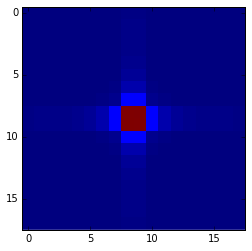

In [4]:
wfs.analyze(src)
imshow(wfs.frame.host(),interpolation='none')
print np.sum(wfs.frame.host())*1e-9, src.nPhoton*1e-9

In [5]:
atm = ceo.Atmosphere(0.15,30)

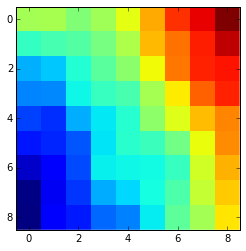

In [6]:
p = d/(NP-1)
atm.reset()
atm.get_phase_screen(src,p,NP,p,NP,0.0)
phase = src.phase
imshow(phase.host(),interpolation='none')

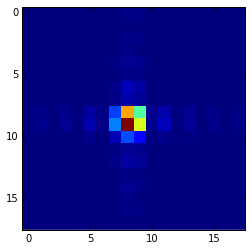

In [7]:
#wfs.calibrate(src,1.0)
wfs.reset()
wfs.analyze(src)
imshow(wfs.frame.host(),interpolation='none')

In [8]:
print wfs.c.host()

[[  1.68621796e-06  -2.54515135e-06]]


In [9]:
print np.mean(phase.host_data[:,0] - phase.host_data[:,-1])/d ,  np.mean(phase.host_data[0,:] - phase.host_data[-1,:])/d

-2.65509982e-06 1.72685517441e-06


In [10]:
atm.get_phase_screen_gradientSH(wfs,NL,d,src,0.0)

In [11]:
print wfs.c.host()

[[  1.70398835e-06  -2.70564897e-06]]


In [12]:
sx = ceo.cuFloatArray(shape=(NL,NL),dev_malloc=True)
sy = ceo.cuFloatArray(shape=(NL,NL),dev_malloc=True)

In [13]:
ceo.wavefrontFiniteDifference(sx,sy,NL,phase,n,d)

In [14]:
print sx.host(), sy.host()

[[  1.72685543e-06]] [[ -2.65509948e-06]]


In [15]:
G = ceo.SparseGradient(2,5,1./6.0)

In [16]:
print G.nnz
print G.csrValH.host().T
print 1.0/6
print G.csrColIndH.host().T
print G.csrRowPtrH.host().T

96
[[ 1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.
  -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1.
   1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.
  -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1.
   1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.
  -1. -1. -1. -1. -1. -1.]]
0.166666666667
[[  0   1   2   3   4   5  55  56  57  58  59  60   5   6   7   8   9  10
   60  61  62  63  64  65  55  56  57  58  59  60 110 111 112 113 114 115
   60  61  62  63  64  65 115 116 117 118 119 120   0  11  22  33  44  55
    5  16  27  38  49  60   5  16  27  38  49  60  10  21  32  43  54  65
   55  66  77  88  99 110  60  71  82  93 104 115  60  71  82  93 104 115
   65  76  87  98 109 120]]
[[ 0 12 24 36 48 60 72 84 96]]
